# Argo Section in region studied in Cole 2012

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.path import Path
import seaborn
import pandas as pd
import numpy as np
from importlib import reload
import cartopy.crs as ccrs
import cmocean.cm as cmo

import density_funcs as df
import EV_funcs as ef
import filt_funcs as ff
import plot_funcs as pf
import processing_funcs as prf

## Section Selection

In [3]:
box = [-159,-157,22.75,34.5,0,2000]

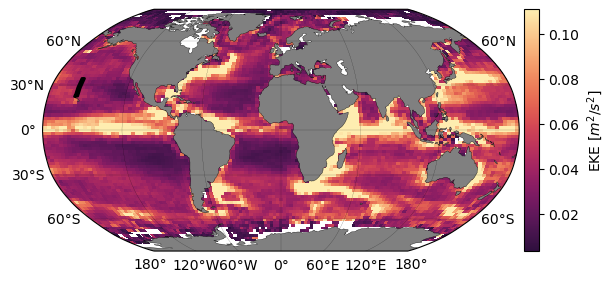

In [5]:
pf.plot_box([box])

In [6]:
scales = [50,100,200]
sample_max = 12
variable = 'SPICE'

In [14]:
sect = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-159,-157)_lat:(22.75,34.5)_ds_z.nc')
sect_EKE = ef.get_EKE_da(sect,scales,sample_max,variable)

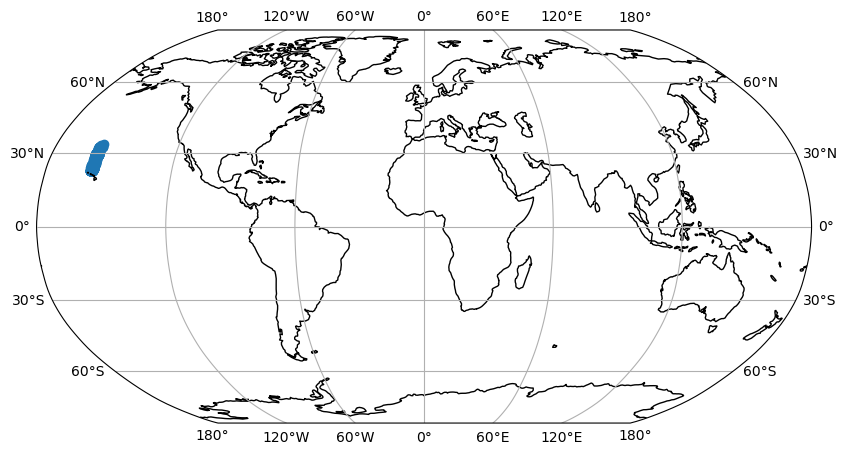

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.set_global()
ax.gridlines(draw_labels=True)
ax.scatter(sect.LONGITUDE,sect.LATITUDE,transform=ccrs.PlateCarree())

## T,S,SIG0,SPICE Sections

In [75]:
#        CT                     SA                      SIG0                    SPICE                CT gradient                  SA gradient
names = [cmo.thermal,           cmo.haline,             cmo.dense,              cmo.deep,            cmo.balance,                 cmo.balance]
bounds = [np.linspace(-2,22,7), np.linspace(33,36.5,8), np.linspace(24,28.5,6), np.linspace(-2,5,7), np.linspace(-0.04,0.04,10), np.linspace(-0.004,0.004,10)]
cmaps = []
norms = []

for n in range(0,len(names)):
    cmap = names[n]
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
    norm = mpl.colors.BoundaryNorm(bounds[n], cmap.N)
    
    cmaps.append(cmap)
    norms.append(norm)

In [38]:
sect = sect.sortby('LATITUDE')
EKE = sect_EKE.sortby('LATITUDE').where(sect_EKE.mask==1)

levels   = np.linspace(sect.isel(PRES_INTERPOLATED=slice(200,2000)).SIG0.min(),sect.isel(PRES_INTERPOLATED=slice(200,2000)).SIG0.max(),8)

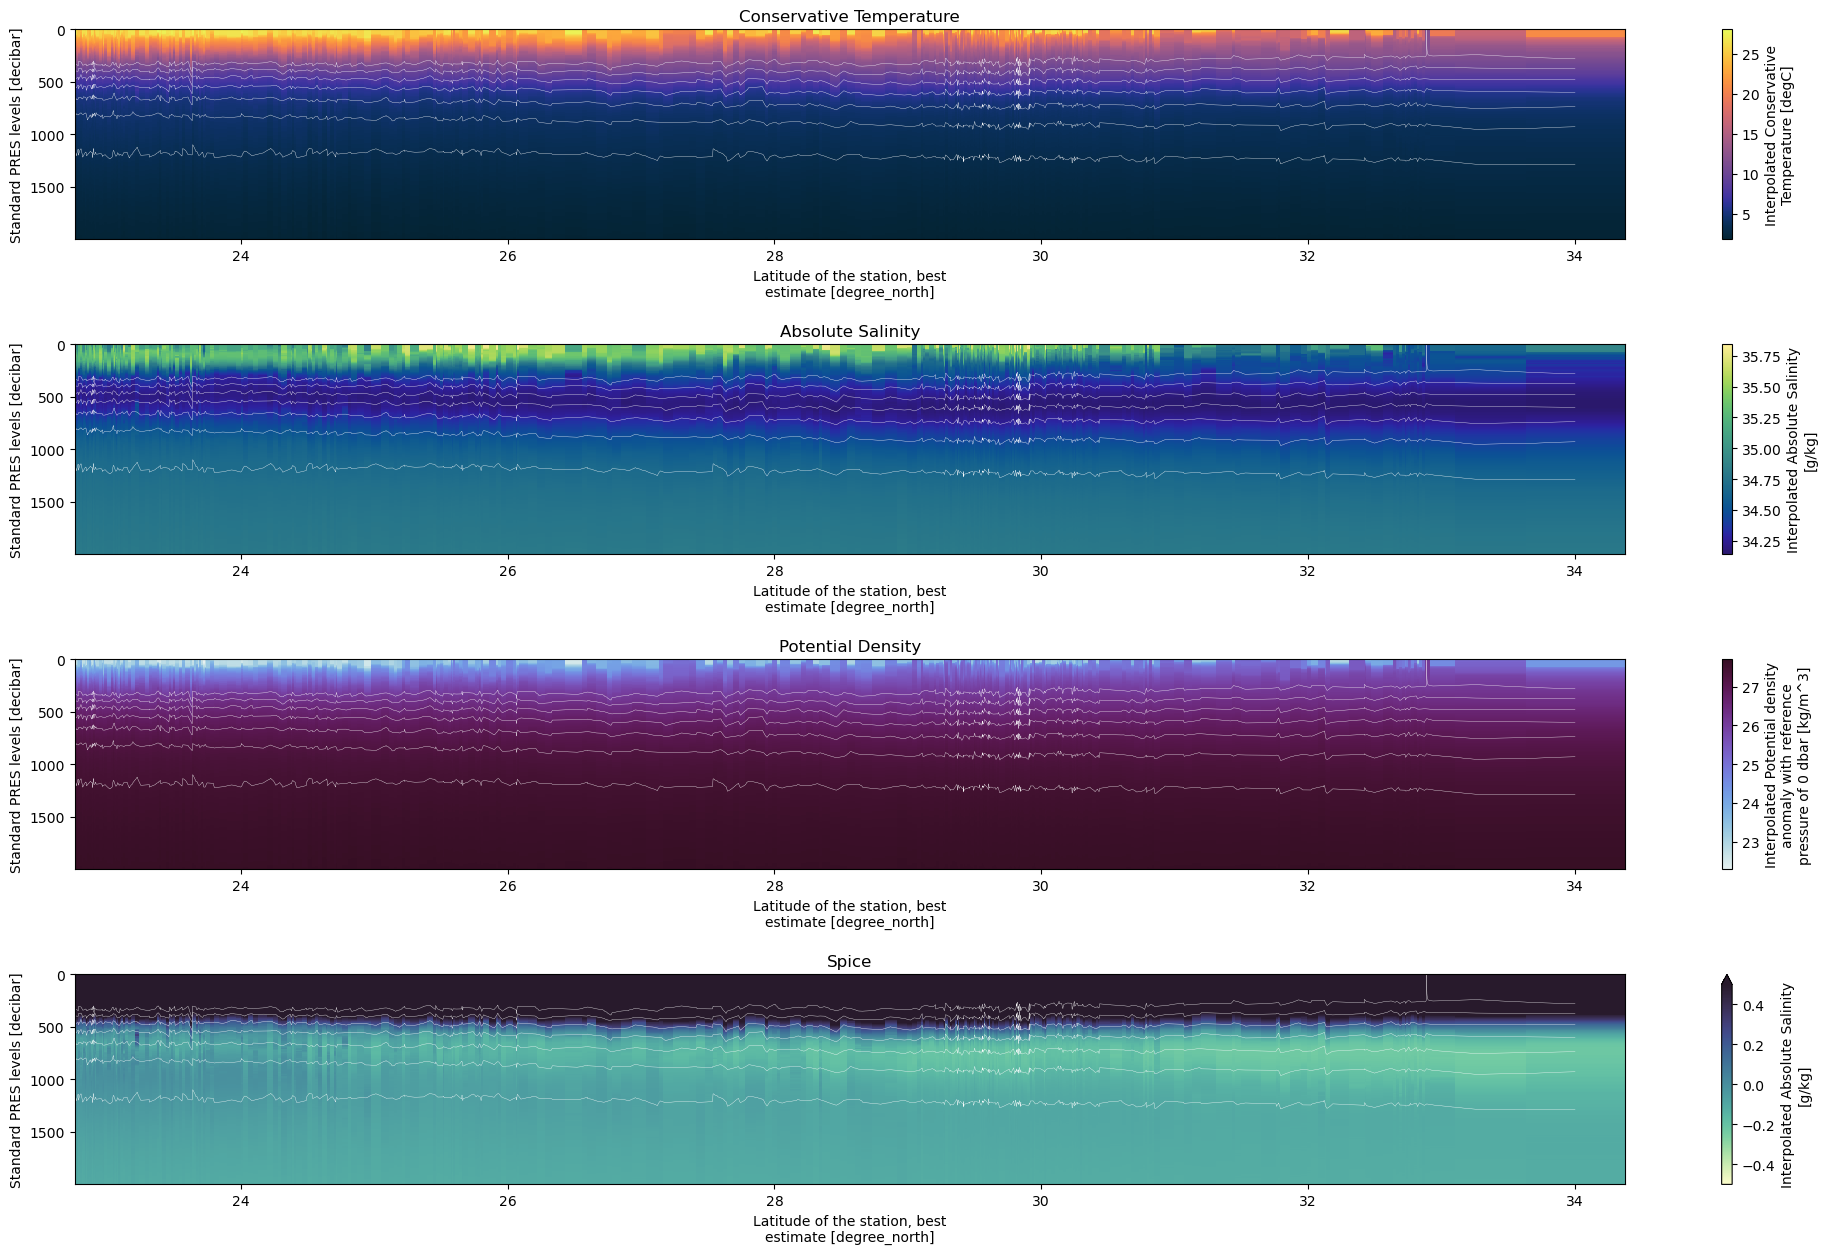

In [79]:
plt.figure(figsize=(25,15))

plt.subplot(411)
sect.CT.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.thermal)
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels, colors='w', linewidths=0.25)
plt.gca().invert_yaxis()
plt.title('Conservative Temperature')

plt.subplot(412)
sect.SA.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.haline)
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels, colors='w', linewidths=0.25)
plt.gca().invert_yaxis()
plt.title('Absolute Salinity')

plt.subplot(413)
sect.SIG0.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.dense)
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels, colors='w', linewidths=0.25)
plt.gca().invert_yaxis()
plt.title('Potential Density')

plt.subplot(414)
sect.SPICE.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.deep,vmin=-0.5)
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels, colors='w', linewidths=0.25)
plt.gca().invert_yaxis()
plt.title('Spice')

plt.subplots_adjust(hspace=0.5)

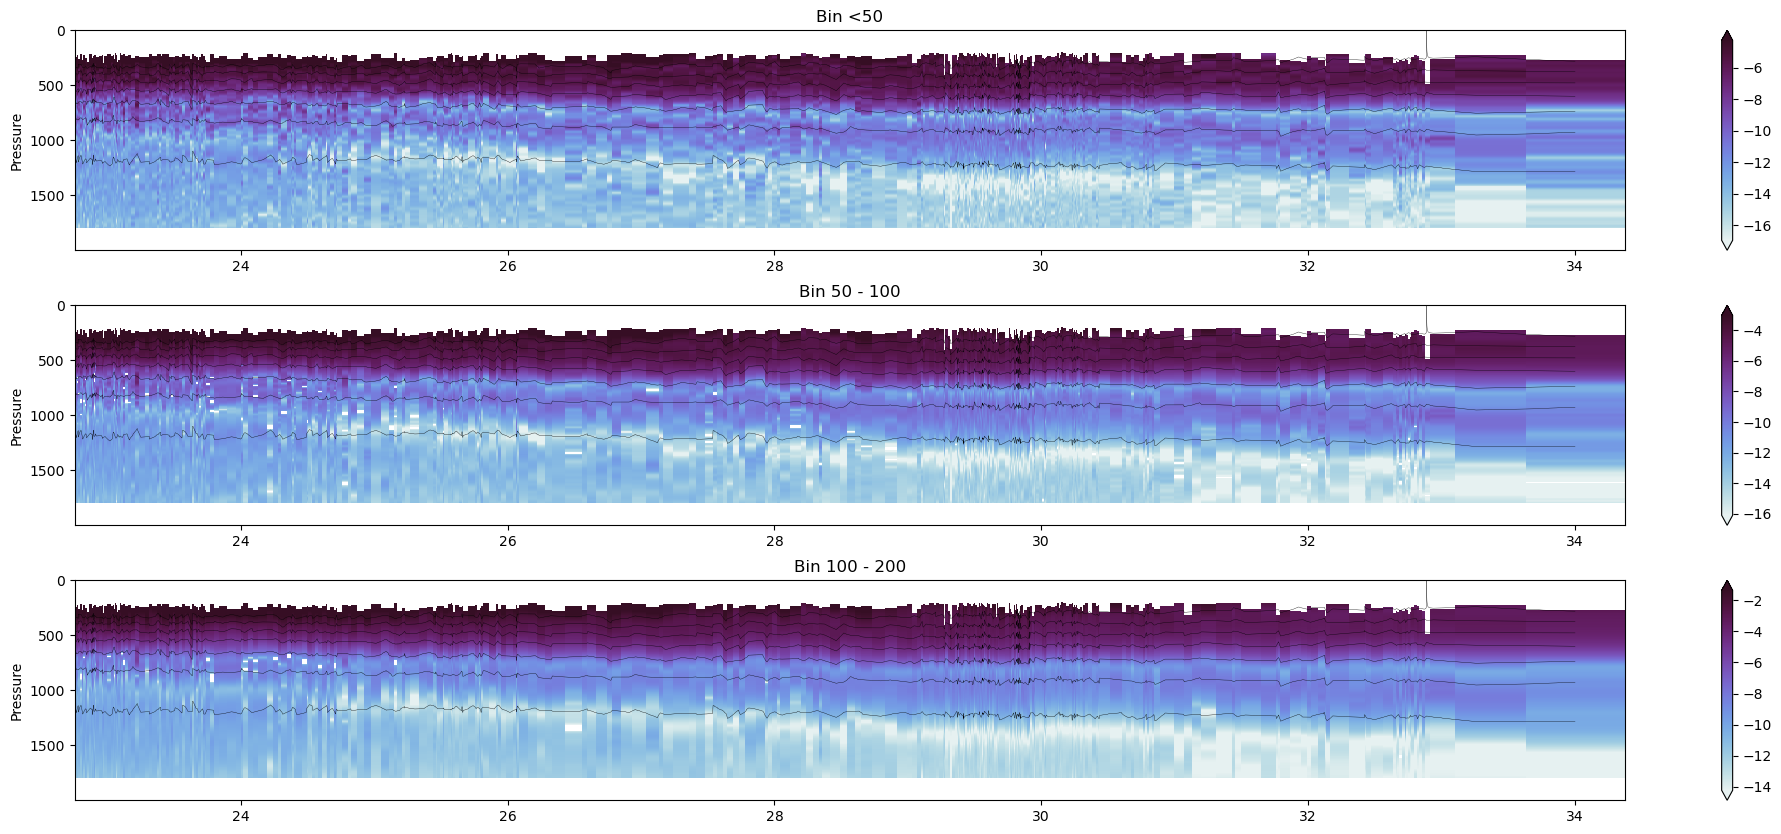

In [39]:
plt.figure(figsize=(25,10))

plt.subplot(311)
np.log(EKE.isel(EKE=0)).plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.dense,robust=True)
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=0.25)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel('Pressure')
plt.title('Bin <{}'.format(scales[0]))

plt.subplot(312)
np.log(EKE.isel(EKE=1)).plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.dense,robust=True)
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=0.25)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel('Pressure')
plt.title('Bin {} - {}'.format(scales[0], scales[1]))

plt.subplot(313)
np.log(EKE.isel(EKE=2)).plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.dense,robust=True)
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=0.25)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel('Pressure')
plt.title('Bin {} - {}'.format(scales[1], scales[2]))

plt.subplots_adjust(hspace=0.25)

## Gradient Plots

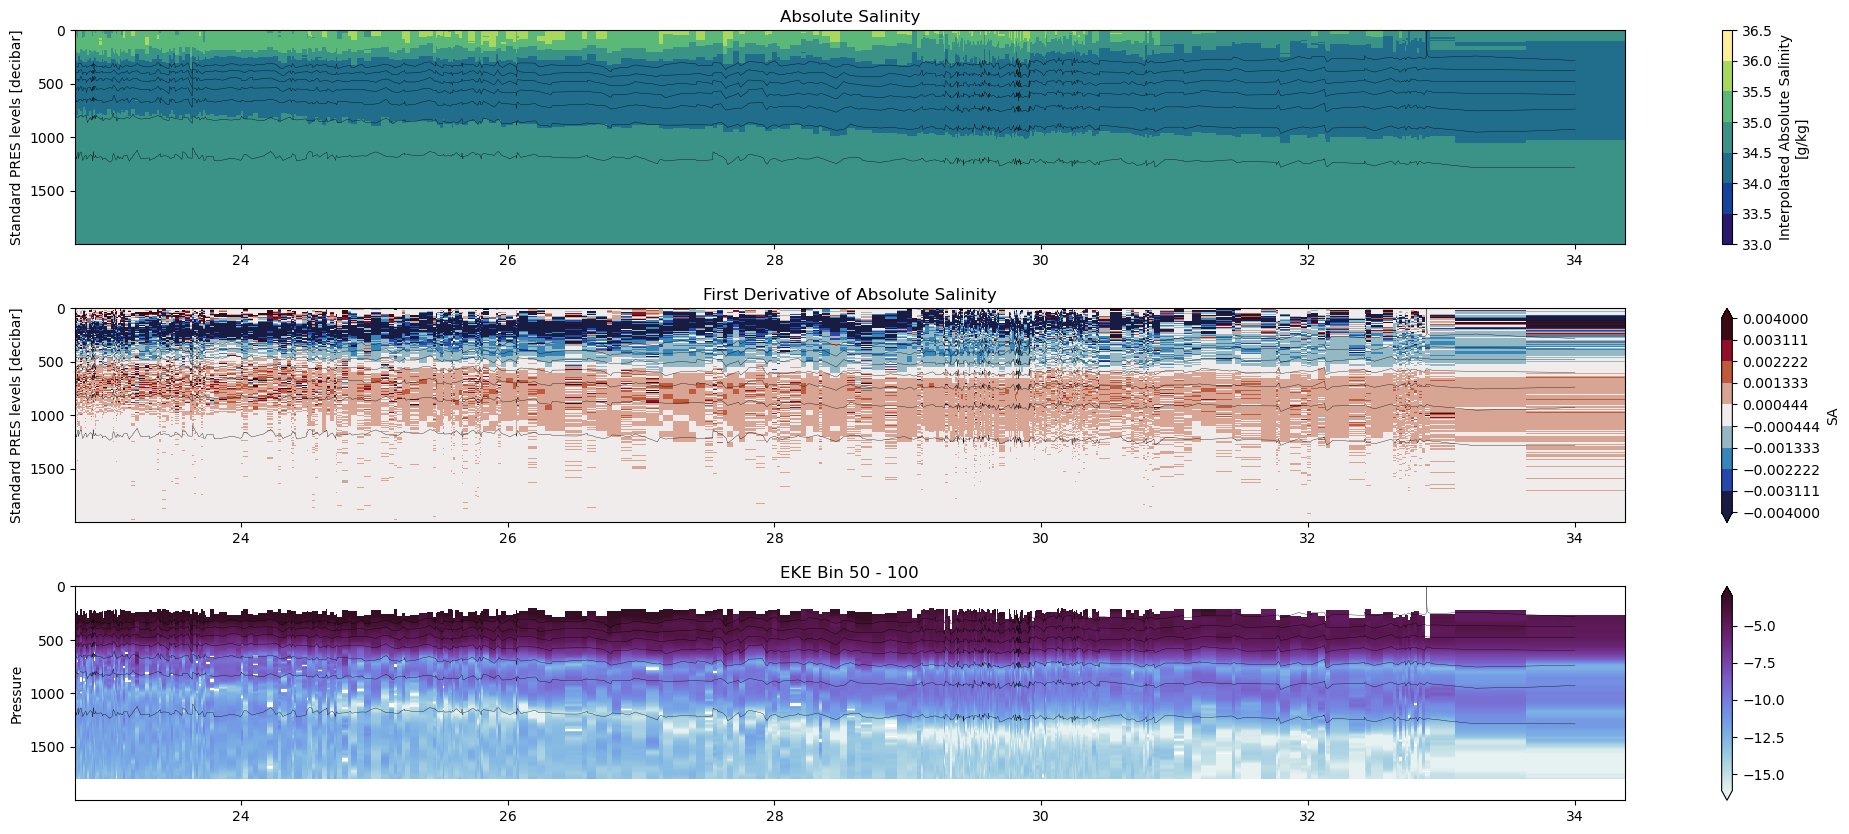

In [40]:
plt.figure(figsize=(25,10))

plt.subplot(311)
sect.SA.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmaps[1], norm=norms[1])
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=0.25)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.title('Absolute Salinity')

plt.subplot(312)
sect.SA.differentiate('PRES_INTERPOLATED').plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmaps[5], norm=norms[5])
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=0.25)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.title('First Derivative of Absolute Salinity')

plt.subplot(313)
np.log(EKE.isel(EKE=1)).plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.dense,robust=True)
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=0.25)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel('Pressure')
plt.title('EKE Bin {} - {}'.format(scales[0], scales[1]))

plt.subplots_adjust(hspace=0.3)

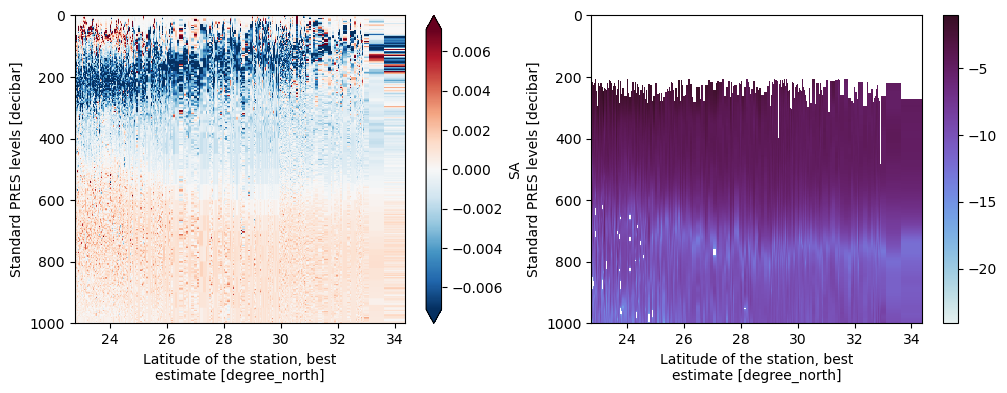

In [74]:
plt.figure(figsize=(12,4))

plt.subplot(121)
sect.SA.differentiate('PRES_INTERPOLATED').plot(x='LATITUDE',y='PRES_INTERPOLATED',robust=True)
plt.ylim(1000,0)

plt.subplot(122)
np.log(EKE.isel(EKE=1)).plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.dense)
plt.ylim(1000,0)

plt.subplots_adjust(wspace=0.25)